
# Problemas de optimización en el modelado de materia oscura galáctica
### Marina Estévez Almenzar
## Trabajo Fin de Grado
## Doble Grado en Ingeniería Informática y Matemáticas
### Tutores: Óscar Sánchez Romero y Pedro A. García Sánchez


---

## Índice
* Introducción
    * El problema astrofísico: el modelado de las masa de materia oscura galáctica
* Parte matemática
    * Definición del problema de minimización y reducción paramétrica
    * Comportamiento asintótico de la función objetivo
* Parte informática
    * Algoritmo de reducción del intervalo de búsqueda
    * Algoritmo de minimización de la función objetivo
* Conclusiones
    * Análisis de los resultados obtenidos
    * Vías futuras

---

---
# Introducción
## El modelado de la masa de materia oscura galáctica
### ¿Cómo surge la teoría de la existencia de materia oscura? Paradoja de las curvas de rotación  
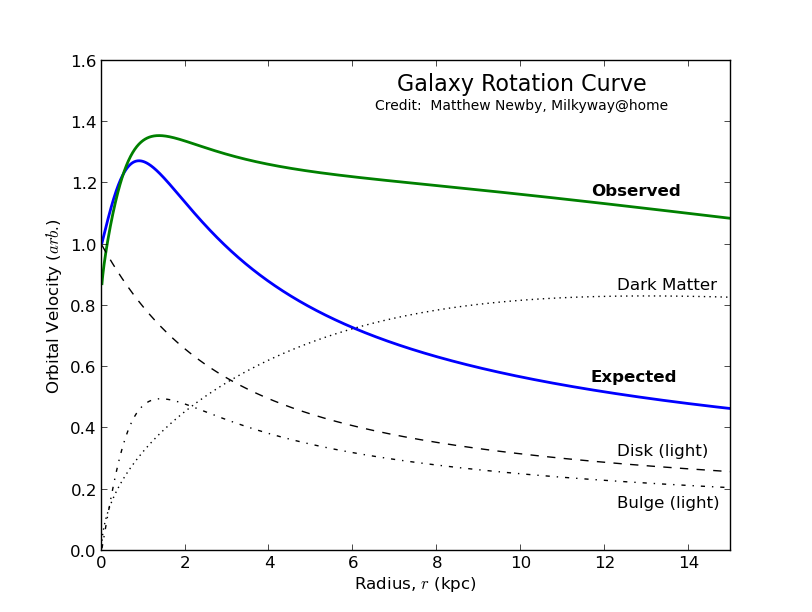  

---

---
### Perfiles de densidad de materia oscura
### $$\rho_{halo}(r) = \rho_0 \rho(sr)$$
* $\rho_{ISO}(r) = \frac{\rho_0}{(1+(rs)^2)}$
* $\rho_{BUR}(r) = \frac{\rho_0}{(1+rs)(1+(rs)^2)}$
* $\rho_{NFW}(r) = \frac{\rho_0}{rs(1+rs)^2}$
* $\rho_{EIN}(r;\,n) = \rho_0\exp{[-(rs)^\frac{1}{n}]}$
* $\rho_{HERN}(r;\,\alpha,\beta,\gamma) = \rho_0\frac{1}{(rs)^\alpha(1+(sr)^\beta)^\gamma}$  

$$M(r) = \int_{W_r}\rho_{halo}(\textbf{p})\,d\textbf{p},$$ 
donde, recordemos, $W_r\subseteq\mathbb{R}^3$ es el volumen encerrado por una esfera de radio $r$.  

$$M(r) = 4\pi\rho_{0}\int_{0}^{r}z^2\rho(sz)\,dz = 4\pi \int_{0}^{r}z^2\rho_{halo}(z)\,dz.$$  

---

---
### Función objetivo y notación

Dado un conjunto de $N$ datos $(V_i, r_i, \sigma_i)$ con $i=1, 2, ..., N$, definimos la función objetivo  

$$\chi^2 = \frac{1}{N-\nu}\sum_{i=1}^{N}\frac{(V_i-V(r_i))}{\sigma_i^2}$$  

donde $V(r_i) = \sqrt{V_{b}^2(r_i)+V_{halo}^2(r_i)}$, donde  
$$V_{halo}^2(r_i) = \frac{GM(r)}{r}$$  
con 
$$M(r) = 4\pi\rho_{0}\int_{0}^{r}z^2\rho(sz)\,dz.$$  

---

---

Si definimos el producto escalar ponderado 

$$\langle u,v\rangle_{\sigma} = \sum_{i=1}^{N}\frac{u_iv_i}{(N-\nu)\sigma^2_i} \quad \forall u,v \in \mathbb{R}^N,$$ 

podemos expresar  

$$\chi^2 = \langle \textbf{V}-V(r), \textbf{V}-V(r) \rangle_{\sigma},$$ 

para luego usar las propiedades estándar de dicho producto y expresar  

$$\chi^2 = \langle \textbf{V},\textbf{V}\rangle_\sigma + \langle V^{\circ 2}_{b}(\textbf{r}),\textbf{e}\rangle_\sigma -2\langle \textbf{V},V(\textbf{r})\rangle_\sigma + \langle V^{\circ 2}_{halo}(\textbf{r}),\textbf{e}\rangle_\sigma.$$  

La siguiente notación también nos será útil:  

$$W^s(r):= \frac{4\pi G}{r}\int_0^r z^2\rho(sz)\,dz = \frac{V_{halo}^2}{\rho_0}.$$ 

---

---

### Definición del problema de minimización y reducción paramétrica
Dados $\textbf{r}$, $\textbf{V}$, $V_{b}(\textbf{r})$ y un perfil de densidad de halo $\rho$, consideramos el siguiente problema de ajuste  

$$\min\{ \chi^2(s,\rho_0)\,|\,\rho_0 \in [0,\infty),\,s \in (0,\infty)\}.$$  

<div class="row">
  <div class="column" style="float: left;width: 49%;padding: 0px">
    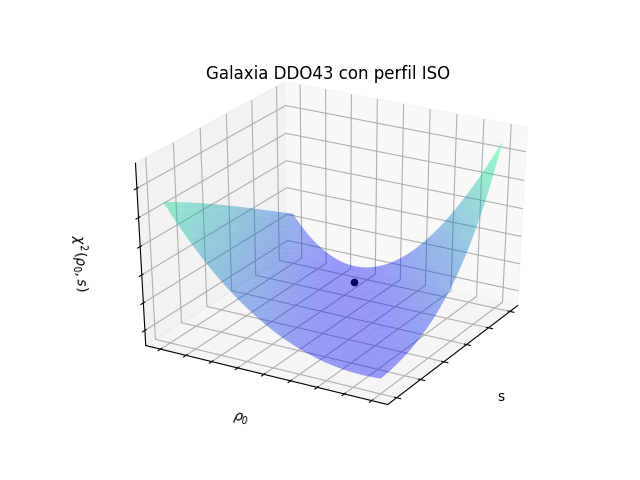
  </div>
  <div class="column" style="float: left;width: 49%;padding: 0px">
    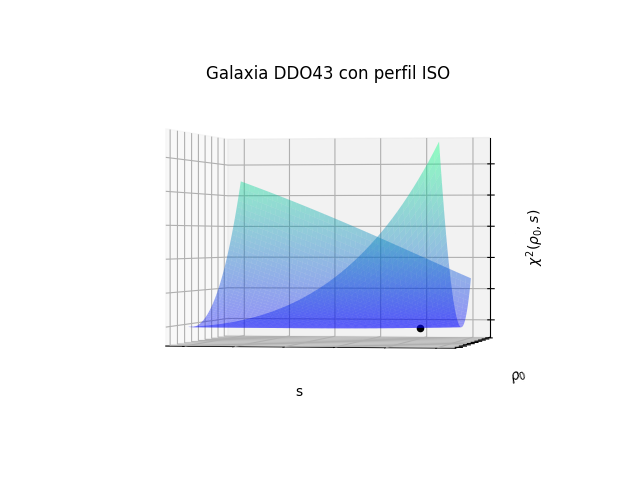
  </div>
</div>

$$\min\Big\{\min\{\chi^2(s,\rho_0)\,|\,\rho_0\in[0,\infty)\}\,\Big|\,s\in(0,\infty)\Big\}$$  

---

$$\text{Existe una única }\rho_0(s) \text{ tal que }\forall s>0\text { se tiene que } \\ \min\{\chi^2(s,\rho_0)\,|\,\rho_0\in[0,\infty)\} = \chi^2(s,\rho_0(s))$$  

<div class="row">
  <div class="column" style="float: left;width: 49%;padding: 0px">
    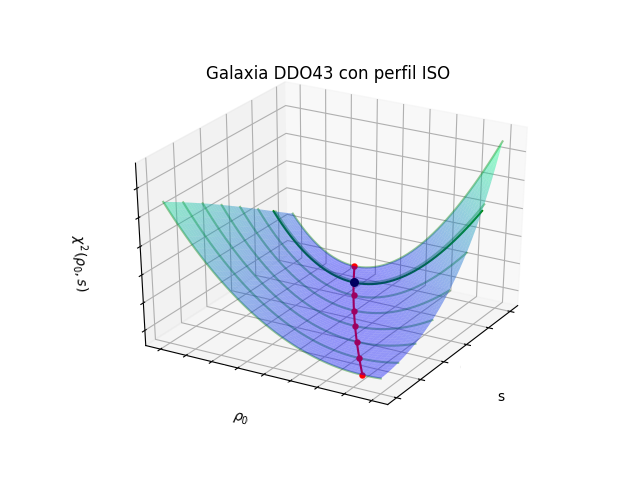
  </div>
  <div class="column" style="float: left;width: 49%;padding: 0px">
    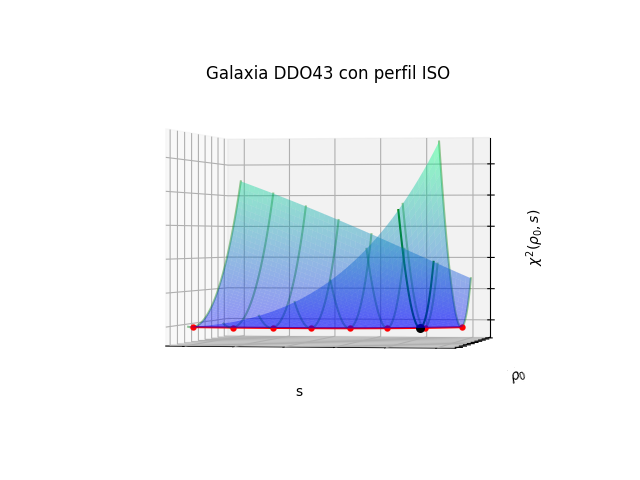
  </div>
</div>

### Teorema
El problema de ajuste $\min\{ \chi^2(s,\rho_0)\,|\,\rho_0 \in [0,\infty),\,s \in (0,\infty)\}$ es equivalente al problema $\min\Big\{\varphi(s):=\chi^2(s,\rho_0(s))\,\Big|\,s\in(0,\infty)\Big\}$, donde $\rho_0(s)$ viene determinado por la Proposición.
### Proposición
Para cualquier $s>0$, la función $\chi^2(s, \cdot)$ alcanza su mínimo valor en un único punto $ \rho_0 = \rho_0(s)$, de forma que para cada $s > 0$ existe un único punto $\rho_0(s)$ tal que 
$$\min\{\chi^2(s,\rho_0)\,|\,\rho_0\in[0,\infty)\} = \chi^2(s,\rho_0(s)).$$  

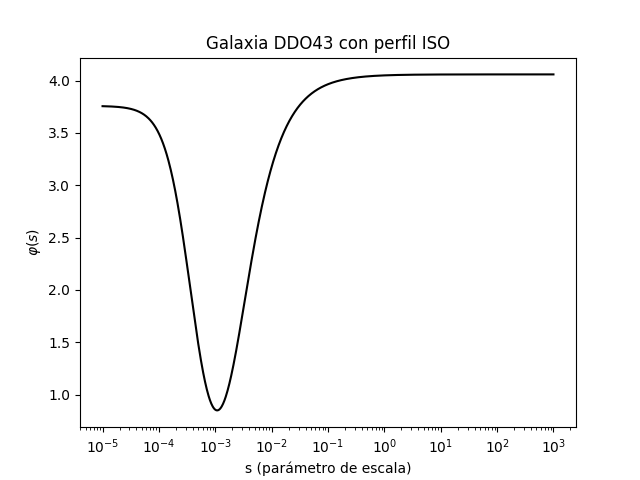  

### Lema
Los límites de $\varphi$ cuando $s\to0$ y $s\to\infty$ existen y sus expresiones se puden deducir.  

Este resultado nos permitirá obtener un intervalo finito $[s_0,s_\infty]$ que se usará como el intervalo de búsqueda del valor óptimo de $s$. Para encontrar dicho intervalo usaremos el criterio de convergencia
$$\frac{|\varphi(s_0)-\lim_{\to0}\varphi(s)|}{\lim_{\to0}\varphi(s)}<tol$$
para el extremo inferior del intervalo y
$$\frac{|\varphi(s_\infty)-\lim_{\to\infty}\varphi(s)|}{\lim_{\to\infty}\varphi(s)}<tol$$
para el extremo superior del intervalo.

---

### Teorema desarrollado
Supongamos que nuestro conjunto de datos $(V_i,r_i,\sigma_i)$ satisface las condiciones siguientes
* $\textbf{r} > 0$,
* para cualquier $r > 0$, $W^s(r)$ es finito y estrictamente positivo,
* $\textbf{V}\geqslant 0$ no es idénticamente nula,
* $V_{b}(\textbf{r}) \geqslant 0$.  

Entonces el problema de ajuste $\min\{ \chi^2(s,\rho_0)\,|\,\rho_0 \in [0,\infty),\,s \in (0,\infty)\}$ es equivalente al problema  

$$\min\Big\{\varphi(s):=\chi^2(s,\rho_0(s))\,\Big|\,s\in(0,\infty)\Big\},$$  
donde la función $\rho_0(s)$ se define en la siguiente Proposición.  

---

---

### Proposición desarrollada

<p style="font-size:85%;">Supongamos que se cumplen las hipótesis del Teorema anterior. Entonces, para cualquier $s>0$, la función $\chi^2(s, \cdot): \mathbb{R}_0^+\rightarrow \mathbb{R}$ alcanza su mínimo valor en un único punto $ \rho_0 = \rho_0(s)$. Es más, si fijamos $s\in\mathbb{R}^+$, entonces</p>  

* <p style="font-size:85%;">$\rho_0(s)=0$ si y sólo si $$\Big\langle\textbf{V},\frac{W^s(\textbf{r})}{V_{b}(\textbf{r})}\Big\rangle_\sigma \leqslant \langle W^s(\textbf{r}),\textbf{e} \rangle_\sigma.$$</p>  
* <p style="font-size:85%;">Si no se cumple la ecuación anterior, entonces $\rho_0(s)>0$ es la única solución de la ecuación normal  
$$\Bigg\langle \textbf{V},\frac{W^s(\textbf{r})}{\Big(V_{b}^{\circ2}(\textbf{r})+\rho_0W^s(\textbf{r})\Big)^{\circ\frac{1}{2}}} \Bigg\rangle_\sigma = \langle W^s(\textbf{r}),\textbf{e}\rangle_\sigma.$$
Es más, si $V_{b}^{\circ2}(\textbf{r}) = \textbf{0}$, se cumple que $$\rho_0(s) = \Bigg(\frac{\Big\langle\textbf{V},(W^s(\textbf{r}))^{\circ\frac{1}{2}}\Big\rangle_\sigma}{\langle W^s(\textbf{r}),\textbf{e}\rangle_\sigma}\Bigg)^2 \, \forall s>0;$$ en caso contrario se cumple que $$0 < \rho_0(s) < \Bigg(\frac{\Big\langle\textbf{V},(W^s(\textbf{r}))^{\circ\frac{1}{2}}\Big\rangle_\sigma}{\langle W^s(\textbf{r}),\textbf{e}\rangle_\sigma}\Bigg)^2.$$ 
</p>
---

---

### Comportamiento asintótico de $\varphi$
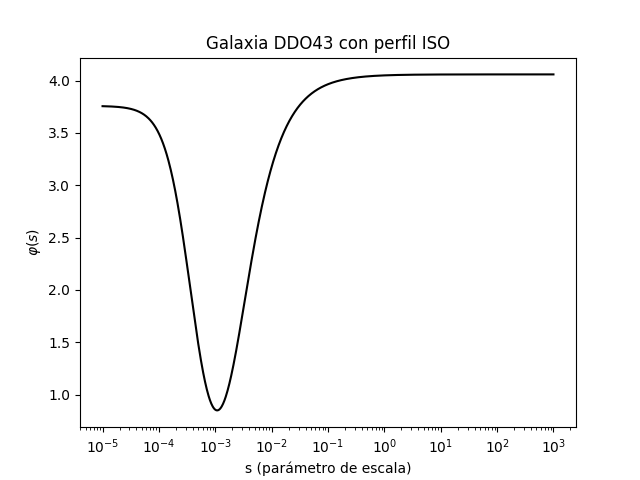   
#### Notación
Escribimos $f(x)\approx g(x)$ para $x\to x_0$ cuando $\lim_{x\to x_0}\frac{f(x)}{g(x)} = 1$.  
Entendemos también que $f(x) = o(g(x))$ es equivalente a decir que $\lim_{x\to\infty}\frac{f(x)}{g(x)} = 0$.  

---

---

<p style="font-size:80%;">Tras estudiar $\lim_{s\to0}\rho_i(rs)$ para $i\in\{\text{ISO, BUR, NFW, EIN, HERN}\}$ se deduce que para cada uno de estos perfiles de densidad de halo, este límite está caracterizado por un exponente líder $\delta$, tomando la forma</p>  
$$\rho(rs) \approx (rs)^\delta + o((rs)^\delta),$$  

<p style="font-size:80%;">Para estudiar $\lim_{s\to\infty}\rho_i(rs)$ con $i\in\{\text{ISO, BUR, NFW, EIN, HERN}\}$ distinguiremos entre los perfiles con masa finita (EIN y HERN) y los perfiles con masa infinita (ISO, BUR y NFW).  
Diremos que un perfil tiene masa finita si</p>
$$M(\infty)=4\pi\int_0^\infty z^2\rho(z)dz = M < \infty.$$
<p style="font-size:80%;">El límite cuando $s\to\infty$ de los perfiles con masa infinita está caracterizado por una constante positiva $\omega\leq3$, tomando la forma</p>
$$\rho(rs) \approx \frac{1}{(rs)^\omega}$$

---


|Modelo   |$s\to0$          |$s\to\infty$   |
|:---|:----:|---:|
|ISO      |$\delta=0$       |$\omega=2$     |
|BUR      |$\delta=0$       |$\omega=3$     |
|NFW      |$\delta=-1$      |$\omega=3$     |
|EIN      |$\delta=0$       |masa finita    |
|HERN     |$\delta=-\alpha$ |masa finita    |  

$\frac{W^s(r)}{4\pi G} \approx \frac{s^\delta}{3+\delta}r^{2+\delta}+o(s^\delta) \quad \text{cuando } s\to0$  

$\frac{W^s(r)}{4\pi G} \approx \frac{M}{rs^3} \quad \text{para masa finita, cuando } s\to\infty$  

$\frac{W^s(r)}{4\pi G} \approx \frac{K}{rs^3}\log(s) \quad \text{para masa infinita, cuando } \omega=3 \text{ y } s\to\infty$  

$\frac{W^s(r)}{4\pi G} \approx \frac{K}{3-\omega}s^{-\omega} r^{2-\omega} \quad \text{para masa infinita, cuando } \omega<3 \text{ y } s\to\infty$  

$$\frac{W^s(r)}{4\pi G} \approx \mu(s)g(r)$$  

|$\lim_{s\to0}\varphi(s)$|$\lim_{s\to\infty}\varphi(s)$   |
|:---|---:|
|$\delta\leq0$      |$\omega\leq3$     |
|$g(r) = g_0(r) := r^{\circ(2+\delta)}$|$g(r) = g_\infty(r) := r^{(2-\omega)}$     |  

### Lema desarrollado
* Si un perfil de densidad de materia oscura normalizado verifica, o bien , o bien , entonces $\lim_{s\to\infty}\varphi(s)$ existe y viene dado por la siguiente expresión $$\lim_{s\to\infty}\varphi(s)=\langle\textbf{V}-V_\infty^{lim}(\textbf{r}), \textbf{V}-V_\infty^{lim}(\textbf{r})\rangle_\sigma.$$ Aquí, $V_\infty^{lim}(\textbf{r})=\big(V_b^{\circ2}(\textbf{r})+Xg_\infty(\textbf{r})\big)^{\circ\frac{1}{2}}$, con $g_\infty$ dada en la Tabla \ref{tab:lim} y $X$ dada por la raíz de $$\Bigg\langle\textbf{V}, \frac{g_\infty(\textbf{r})}{\big(V_b^{\circ2}(\textbf{r})+Xg_\infty(\textbf{r})\big)^{\circ\frac{1}{2}}}\Bigg\rangle_\sigma = \langle g_\infty(\textbf{r}),\textbf{e}\rangle_\sigma,$$ en caso de que tenga sentido, o $X=0$ si $$\langle g_\infty(\textbf{r}),\textbf{e}\rangle_\sigma \geq \bigg\langle\textbf{V},\frac{g_\infty(\textbf{r})}{V_b(\textbf{r})}\bigg\rangle_\sigma.$$
* Si un perfil de densidad de materia oscura normalizado verifica \eqref{eq:rhoapprox}, entonces $\lim_{s\to0}\varphi(s)$ existe y viene dado por la siguiente expresión $$\lim_{s\to0}\varphi(s)=\langle\textbf{V}-V_0^{lim}(\textbf{r}), \textbf{V}-V_0^{lim}(\textbf{r})\rangle_\sigma.$$ Aquí, $V_0^{lim}(\textbf{r})=\big(V_b^{\circ2}(\textbf{r})+Xg_0(\textbf{r})\big)^{\circ2}$, con $g_0$ dada en la Tabla \ref{tab:lim} y $X$ dada por la raíz de $$\Bigg\langle\textbf{V}, \frac{g_0(\textbf{r})}{\big(V_b^{\circ2}(\textbf{r})+Xg_0(\textbf{r})\big)^{\circ\frac{1}{2}}}\Bigg\rangle_\sigma = \langle g_0(\textbf{r}),\textbf{e}\rangle_\sigma,$$ en caso de que tenga sentido, o $X=0$ si $$\langle g_0(\textbf{r}),\textbf{e}\rangle_\sigma \geq \bigg\langle\textbf{V},\frac{g_0(\textbf{r})}{V_b(\textbf{r})}\bigg\rangle_\sigma.$$

### Algoritmo de reducción intervalo de búsqueda

In [23]:
import matplotlib.pyplot as plt
from scipy.io import arff
import numpy as np
import commonFunctions as cf
import data as dt
from calLimits import *
from intervalMinim import *

galaxlist = ["DDO43"]
galaxies = {}
for i in galaxlist:
    fp = open("galaxies/"+i+".arff")
    dat, metadt = arff.loadarff(fp)
    data = []
    for d in dat.tolist():
        data.append(np.asarray(d))
    data = np.asarray(data)
    galaxies[i] = {
        "R": data[:, 0] * 1000,
        "vrot": abs(data[:, 1]),
        "errs": data[:, 3],
        "vbary": np.sqrt(data[:, 4] ** 2 + data[:, 5] ** 2)
    }
    fp.close()

### Algoritmo de reducción intervalo de búsqueda

In [24]:
galaxdata = {
    "radii": np.array([]), "vrot": np.array([]), "vbary": np.array([]), "weights": np.array([]), "CteDim": dt.CteDim, "totalnullvbary": False, "somenullvbary": False, "vones": np.array([]), "vv": np.array([]), "vvbary": np.array([]), "profile": '', "graphic": False
}

for i in galaxlist:
    radii = galaxies[i]["R"]
    galaxdata["radii"] = radii
    vrot = galaxies[i]["vrot"]
    galaxdata["vrot"] = vrot
    vbary = galaxies[i]["vbary"]
    galaxdata["vbary"] = vbary
    n = len(radii)
    vones = np.ones(n)
    galaxdata["vones"] = vones
    weights = 1 / ((n - dt.nu) * galaxies[i]["errs"] ** 2)
    galaxdata["weights"] = weights
    totalnullvbary = np.sum(vbary) == 0
    galaxdata["totalnullvbary"] = totalnullvbary
    somenullvbary = round(np.prod(vbary)) == 0
    galaxdata["somenullvbary"] = somenullvbary
    vv = cf.vv(galaxdata)
    galaxdata["vv"] = vv
    vvbary = cf.vvbary(galaxdata)
    galaxdata["vvbary"] = vvbary
    galaxdata["profile"] = "ISO"
    galaxdata["graphic"] = True

### Algoritmo de reducción intervalo de búsqueda

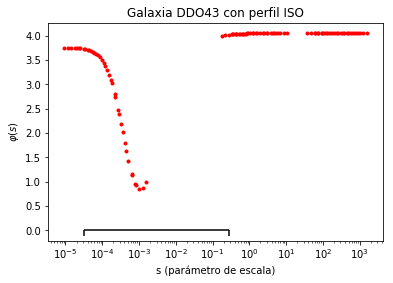

In [25]:
varphiLim0, varphiLimInf = calLimits(galaxdata)
res = intervalMin(varphiLim0, varphiLimInf, galaxdata)
intervalinf = res[0][0]
intervalsup = res[0][1]
Xi = res[1]
Yi = res[2]
intinfmin = res[3]
intsupmin = res[4]
plt.semilogx()
plt.title("Galaxia DDO43 con perfil ISO")
plt.xlabel("s (parámetro de escala)")
plt.ylabel(r"$\varphi(s)$")
plt.scatter(intervalinf, 0, c='black', marker=3)
plt.scatter(intervalsup, 0, c='black', marker=3)
plt.hlines(0, intervalinf, intervalsup)
plt.scatter(Xi, Yi, c='r', marker='.')

### Algoritmo de reducción intervalo de búsqueda

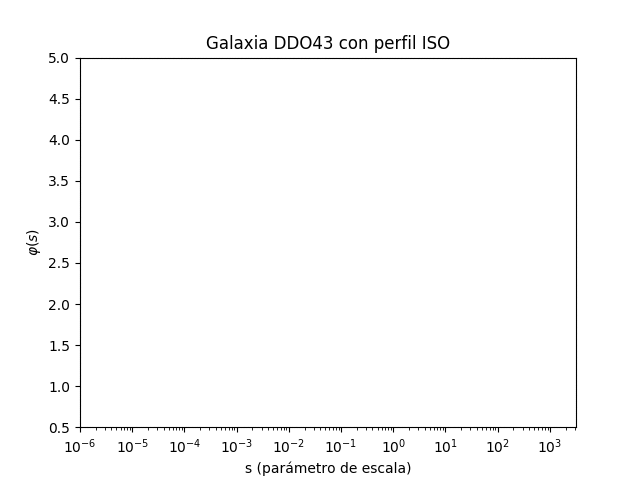  

### Observaciones en el algoritmo de reducción intervalo de búsqueda
<div class="row">
  <div class="column" style="float: left;width: 49%;padding: 0px">
    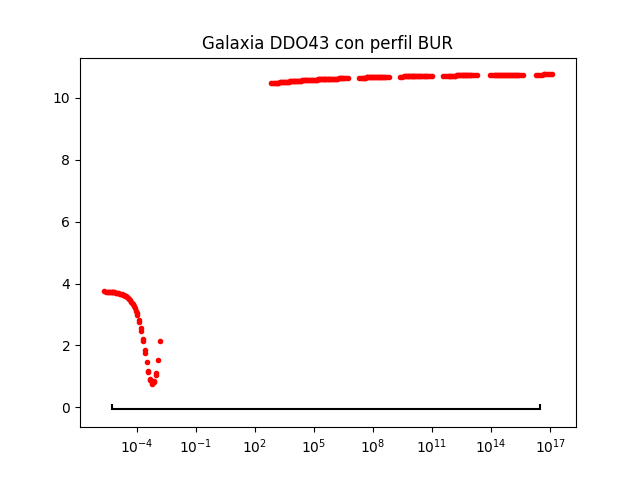
  </div>
  <div class="column" style="float: left;width: 49%;padding: 0px">
    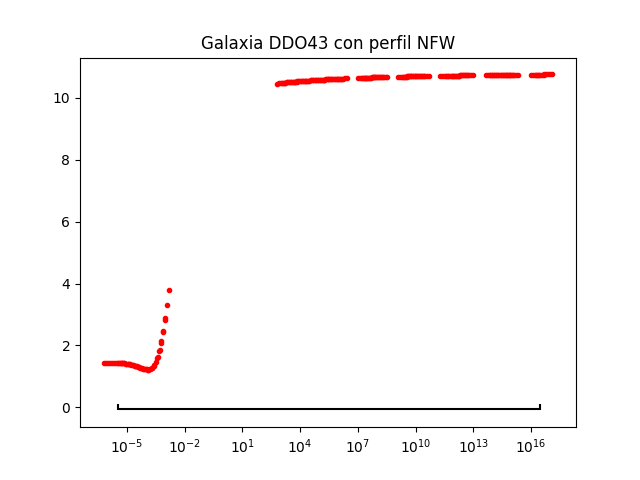
  </div>
</div>

#### Tras aplicar la mejora propuesta
<div class="row">
  <div class="column" style="float: left;width: 49%;padding: 0px">
    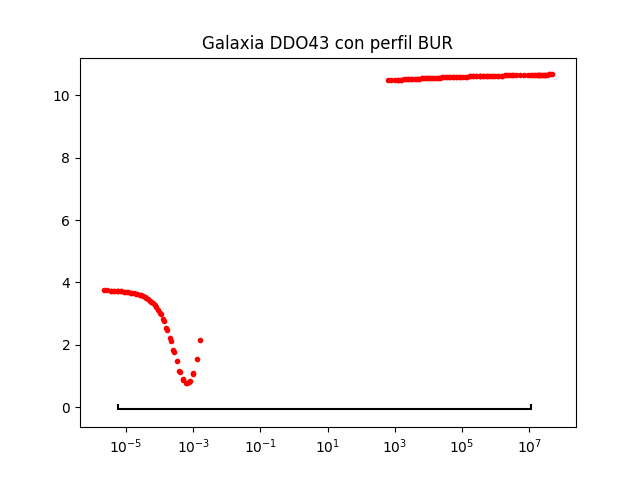
  </div>
  <div class="column" style="float: left;width: 49%;padding: 0px">
    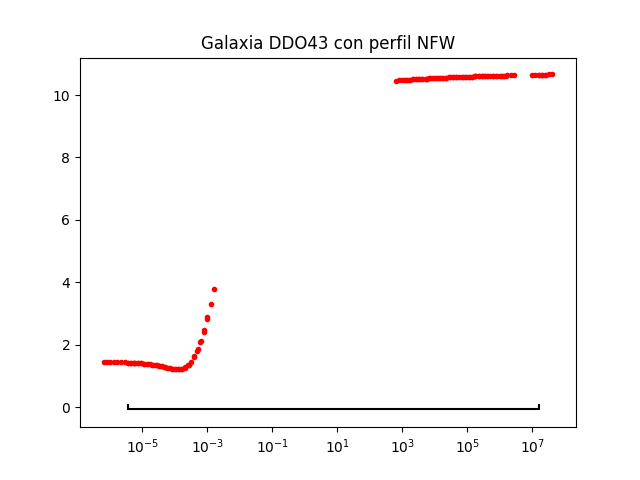
  </div>
</div>

### Algoritmo de minimización de $\varphi$
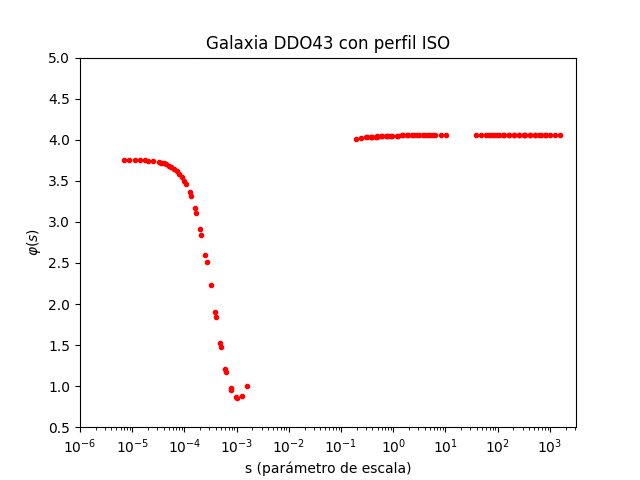

### Observaciones en el algoritmo de minimización de $\varphi$
<div class="row">
  <div class="column" style="float: left;width: 49%;padding: 0px">
    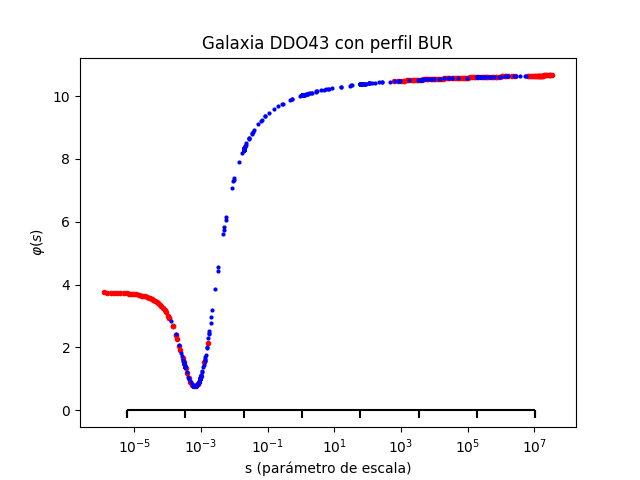
  </div>
  <div class="column" style="float: left;width: 49%;padding: 0px">
    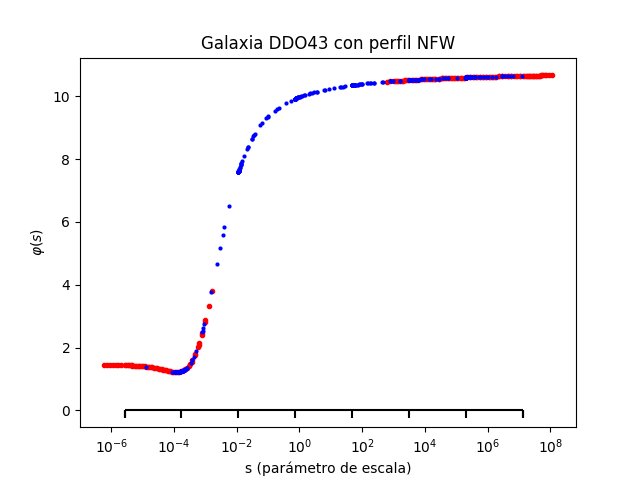
  </div>
</div>

#### Tras aplicar la mejora propuesta
<div class="row">
  <div class="column" style="float: left;width: 49%;padding: 0px">
    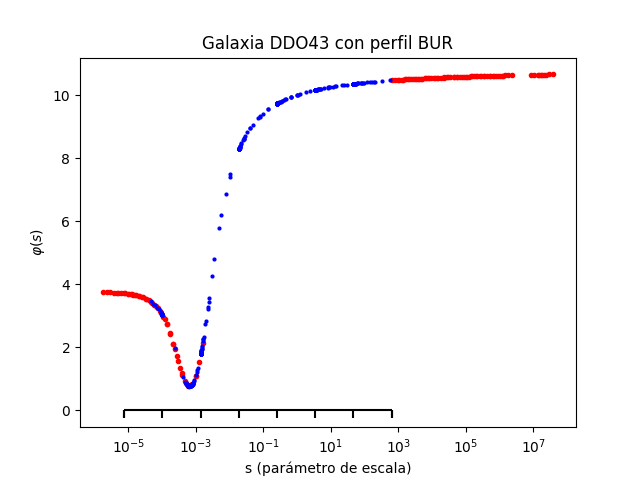
  </div>
  <div class="column" style="float: left;width: 49%;padding: 0px">
    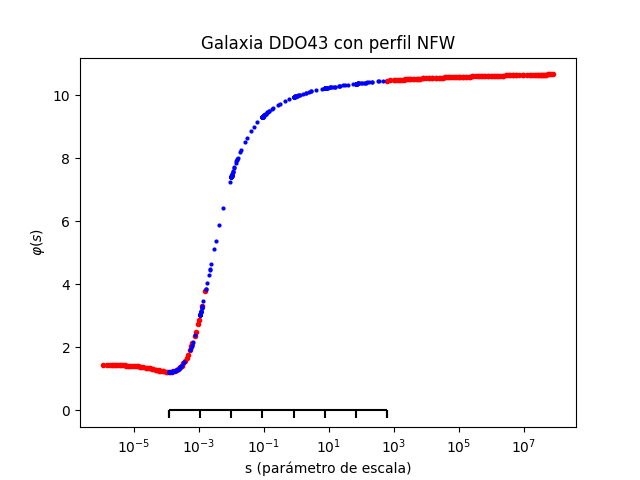
  </div>
</div>